<a href="https://colab.research.google.com/github/AjinkyaSar/financial-analytics-projects/blob/main/Financial_Health_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: Import pandas, numpy, matplotlib, seaborn, and statsmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
# prompt: load dataset from "/content/Financial_Health.xlsx"

df = pd.read_excel("/content/Financial_Health.xlsx")
print(df.head())


  Company_ID      Company_Name       Industry  Year  Total_Revenue_USD  \
0     C00001   Norris and Sons        Finance  2015       1.027334e+09   
1     C00002  Garrison-Schmidt        Finance  2016       9.054109e+08   
2     C00003    Collins-Horton  Manufacturing  2017       4.702907e+09   
3     C00004   Johnson-Sanders  Manufacturing  2018       1.307339e+09   
4     C00005    Smith-Franklin     Healthcare  2019       1.874920e+09   

   Gross_Profit_USD  Operating_Expenses_USD  Net_Income_USD    EBITDA_USD  \
0      1.179003e+09            3.049560e+08    7.468690e+08  1.264810e+09   
1      1.339129e+09            4.871704e+08    8.189346e+08  1.178403e+09   
2      9.444073e+08            1.190481e+08    4.433828e+08  9.167690e+08   
3      4.877999e+08            9.940402e+08    3.346814e+08  7.426552e+08   
4      1.798042e+09            3.430495e+08    6.454143e+08  1.458184e+08   

   Debt_to_Equity_Ratio  Current_Ratio  Quick_Ratio  Return_on_Assets_%  \
0                

In [3]:
df.shape

(10000, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Company_ID              10000 non-null  object 
 1   Company_Name            10000 non-null  object 
 2   Industry                10000 non-null  object 
 3   Year                    10000 non-null  int64  
 4   Total_Revenue_USD       10000 non-null  float64
 5   Gross_Profit_USD        10000 non-null  float64
 6   Operating_Expenses_USD  10000 non-null  float64
 7   Net_Income_USD          10000 non-null  float64
 8   EBITDA_USD              10000 non-null  float64
 9   Debt_to_Equity_Ratio    10000 non-null  float64
 10  Current_Ratio           10000 non-null  float64
 11  Quick_Ratio             10000 non-null  float64
 12  Return_on_Assets_%      10000 non-null  float64
 13  Return_on_Equity_%      10000 non-null  float64
 14  Cash_Flow_USD           10000 non-null 

In [5]:
df.columns

Index(['Company_ID', 'Company_Name', 'Industry', 'Year', 'Total_Revenue_USD',
       'Gross_Profit_USD', 'Operating_Expenses_USD', 'Net_Income_USD',
       'EBITDA_USD', 'Debt_to_Equity_Ratio', 'Current_Ratio', 'Quick_Ratio',
       'Return_on_Assets_%', 'Return_on_Equity_%', 'Cash_Flow_USD',
       'Financial_Health_Score', 'Credit_Rating'],
      dtype='object')

In [6]:
df.describe()

Year  Total_Revenue_USD  Gross_Profit_USD  \
count  10000.000000       1.000000e+04      1.000000e+04   
mean    2019.500000       2.478047e+09      1.002849e+09   
std        2.872425       1.442177e+09      5.791751e+08   
min     2015.000000       1.262214e+06      2.137767e+05   
25%     2017.000000       1.218996e+09      5.066687e+08   
50%     2019.500000       2.481370e+09      9.998616e+08   
75%     2022.000000       3.713956e+09      1.504186e+09   
max     2024.000000       4.999607e+09      1.999548e+09   

       Operating_Expenses_USD  Net_Income_USD    EBITDA_USD  \
count            1.000000e+04    1.000000e+04  1.000000e+04   
mean             5.051261e+08    4.799180e+08  7.513214e+08   
std              2.887368e+08    3.022467e+08  4.339666e+08   
min              8.658335e+04   -4.998344e+07  1.098573e+05   
25%              2.535709e+08    2.170722e+08  3.767166e+08   
50%              5.077906e+08    4.819632e+08  7.479296e+08   
75%              7.569370e+08    7.397643e+08  1.128488e+09   
max              9.999894e+08    9.998447e+08  1.499828e+09   

       Debt_to_Equity_Ratio  Current_Ratio   Quick_Ratio  Return_on_Assets_%  \
count          10000.000000   10000.000000  10000.000000        10000.000000   
mean               1.552612       2.754103      2.158754            7.397171   
std                0.832851       1.296368      1.068381           10.146247   
min                0.100000       0.500000      0.300000           -9.990000   
25%                0.840000       1.650000      1.230000           -1.602500   
50%                1.560000       2.730000      2.170000            7.470000   
75%                2.260000       3.870000      3.080000           16.220000   
max                3.000000       5.000000      4.000000           25.000000   

       Return_on_Equity_%  Cash_Flow_USD  Financial_Health_Score  
count        10000.000000   1.000000e+04            10000.000000  
mean             9.829816   4.551772e+08               50.020800  
std             17.381080   3.183888e+08               28.910883  
min            -20.000000  -9.996195e+07                0.000000  
25%             -5.350000   1.814316e+08               25.000000  
50%              9.865000   4.545447e+08               50.000000  
75%             24.975000   7.285413e+08               75.000000  
max             40.000000   9.999772e+08              100.000000

In [7]:
df.describe(include='object')

Company_ID Company_Name                Industry Credit_Rating
count       10000        10000                   10000         10000
unique       1000          967                       7            10
top        C01000  Smith Group  Information Technology             A
freq           10           50                    1469          2012

In [8]:
# prompt: find missing values

# Finding missing values
print(df.isnull().sum())

Company_ID                0
Company_Name              0
Industry                  0
Year                      0
Total_Revenue_USD         0
Gross_Profit_USD          0
Operating_Expenses_USD    0
Net_Income_USD            0
EBITDA_USD                0
Debt_to_Equity_Ratio      0
Current_Ratio             0
Quick_Ratio               0
Return_on_Assets_%        0
Return_on_Equity_%        0
Cash_Flow_USD             0
Financial_Health_Score    0
Credit_Rating             0
dtype: int64


Interpretation: No null values present in the dataset

In [9]:
# prompt: check duplicates row

# Checking for duplicate rows
duplicate_rows = df.duplicated()
print("\nDuplicate rows:")
print(df[duplicate_rows])

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()
print(f"\nNumber of duplicate rows: {num_duplicate_rows}")

# Optionally, you can drop duplicate rows
# df_cleaned = df.drop_duplicates()
# print(f"\nShape after dropping duplicates: {df_cleaned.shape}")


Duplicate rows:
Empty DataFrame
Columns: [Company_ID, Company_Name, Industry, Year, Total_Revenue_USD, Gross_Profit_USD, Operating_Expenses_USD, Net_Income_USD, EBITDA_USD, Debt_to_Equity_Ratio, Current_Ratio, Quick_Ratio, Return_on_Assets_%, Return_on_Equity_%, Cash_Flow_USD, Financial_Health_Score, Credit_Rating]
Index: []

Number of duplicate rows: 0


Interpretation: No duplicates present in the data

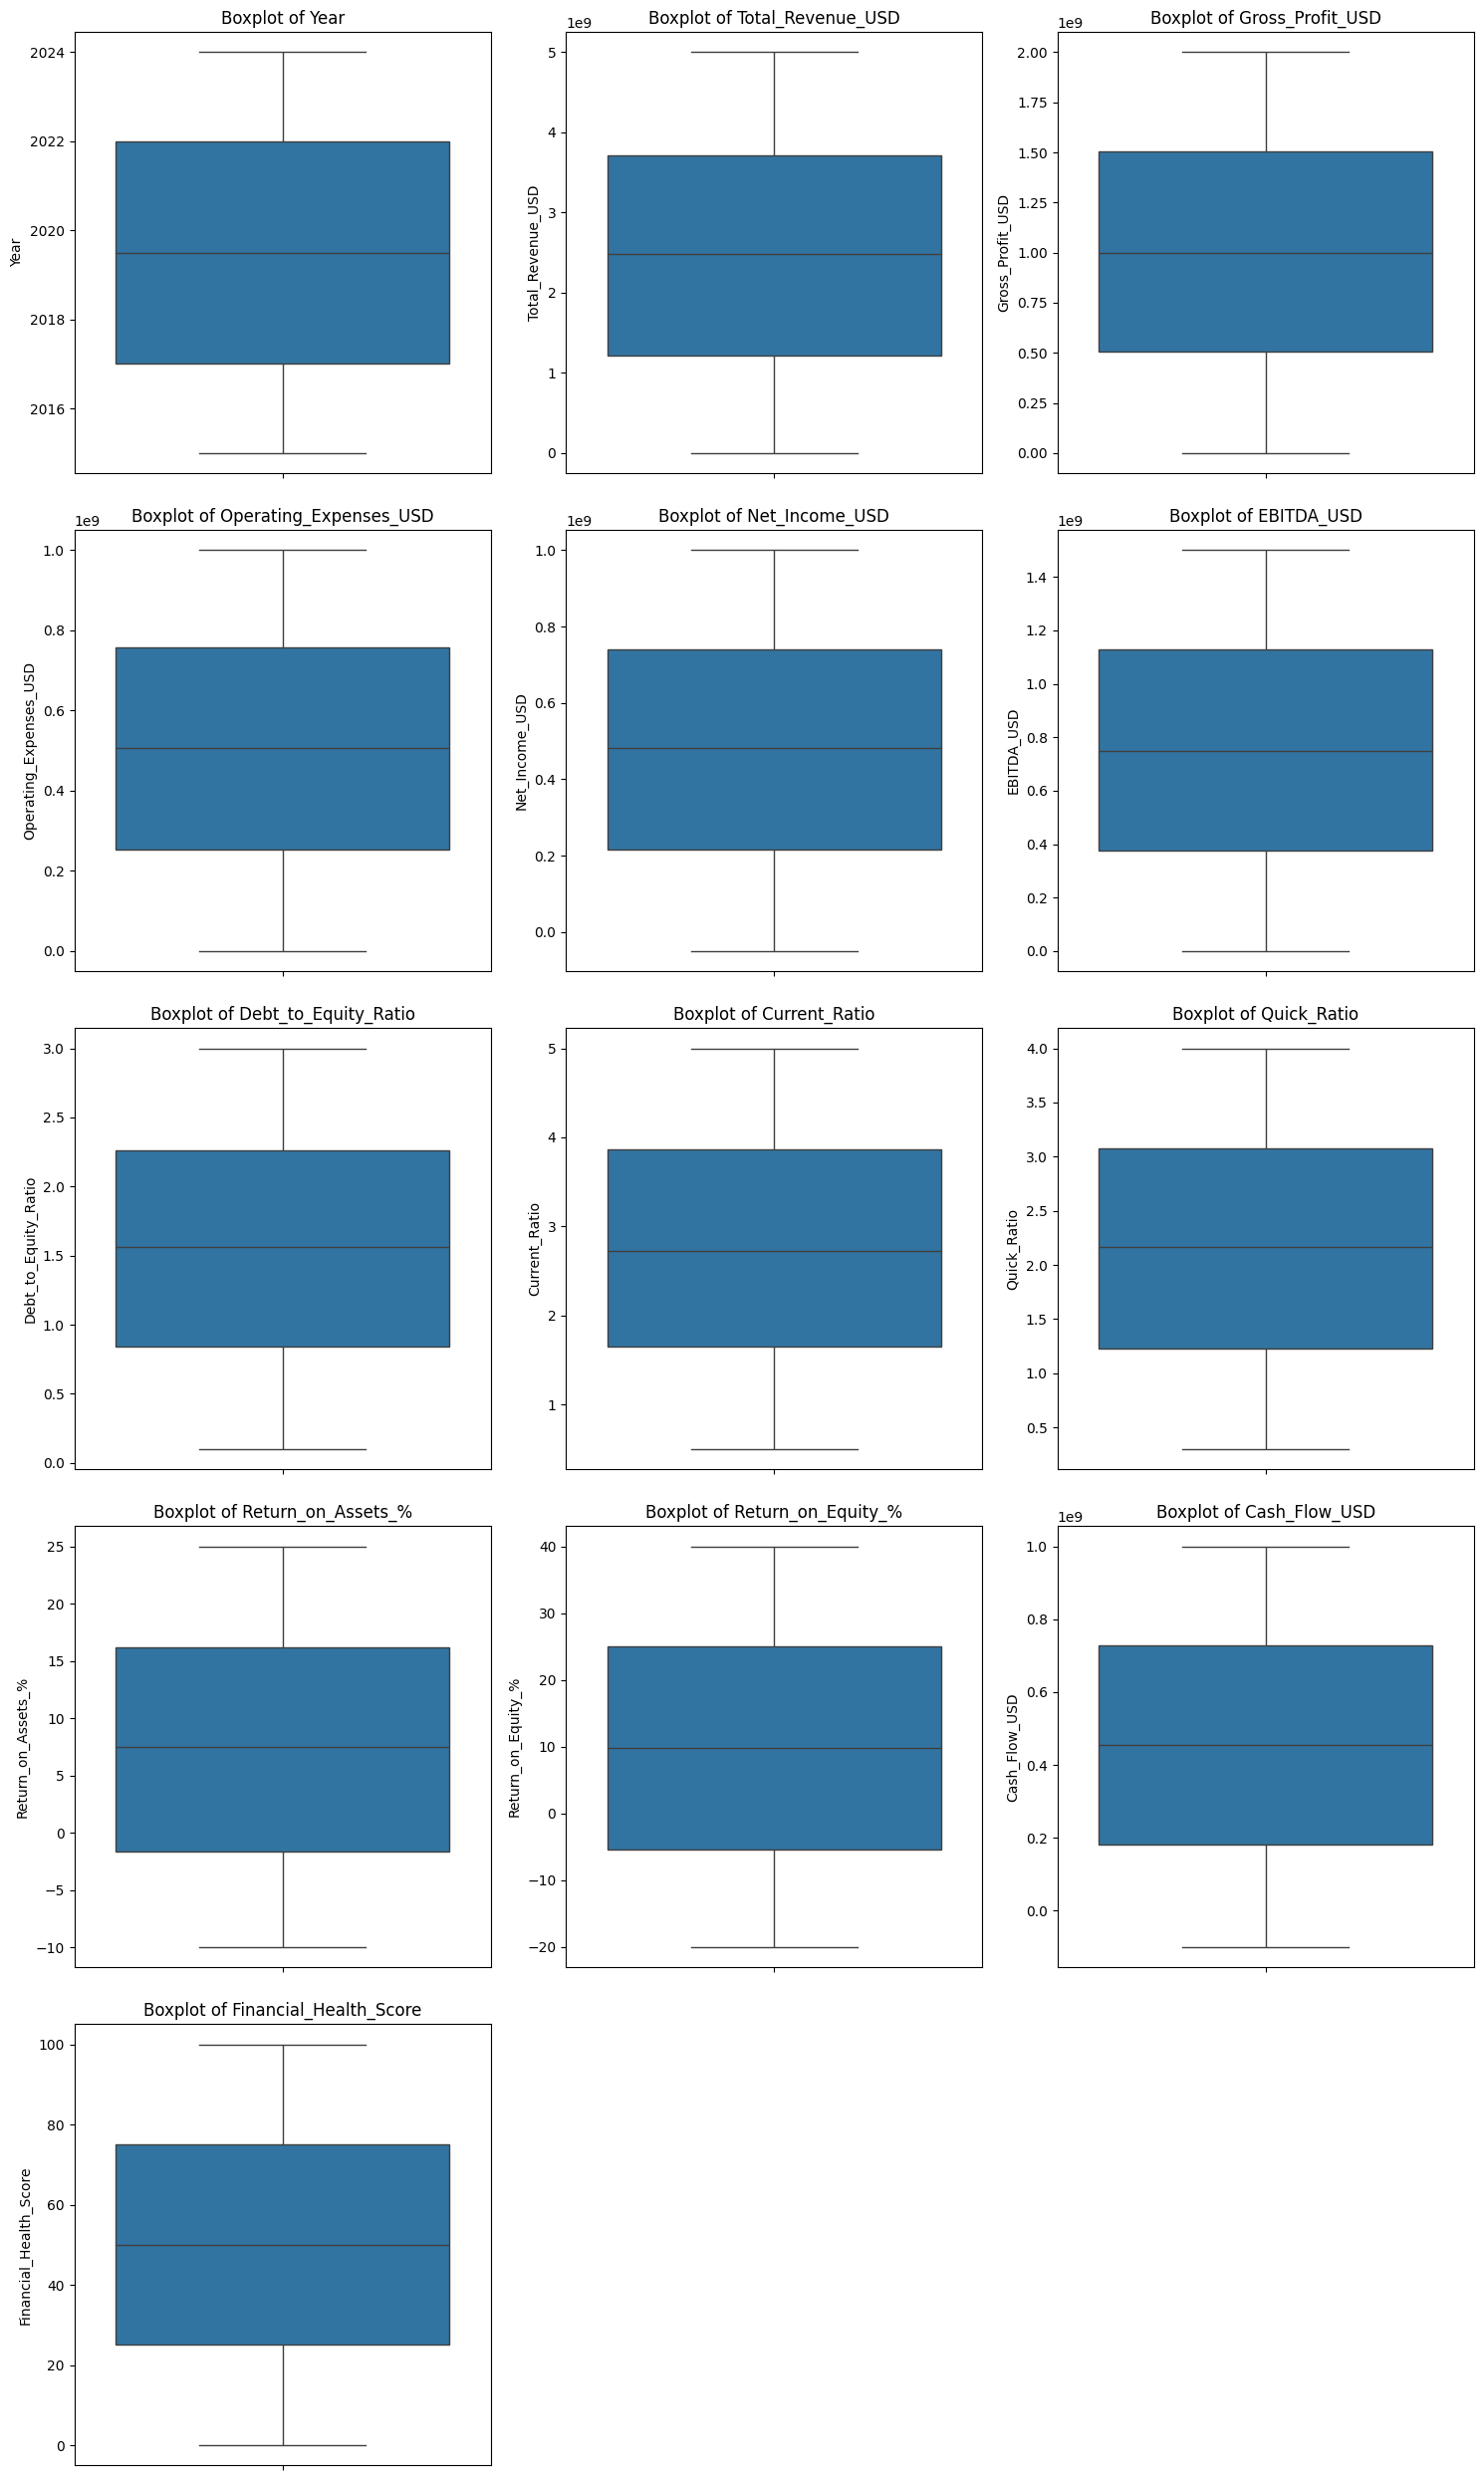

In [10]:
# prompt: Generate boxplots for all numerical columns to check for outliers, excluding binary columns and the furnishing status column. Adjust the grid layout dynamically based on the number of plots, ensuring clear labels and a clean, readable layout.

# Select numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

# Exclude binary columns (assuming binary columns have only two unique values)
binary_cols = [col for col in numerical_cols if df[col].nunique() == 2]

# Exclude the 'FurnishingStatus' column if it exists and is numerical (unlikely but good practice)
# If 'FurnishingStatus' is an object type, it won't be in numerical_cols anyway.
if 'FurnishingStatus' in numerical_cols:
  numerical_cols = numerical_cols.drop('FurnishingStatus')

# Exclude binary columns from the numerical columns for boxplotting
cols_to_boxplot = numerical_cols.difference(binary_cols)

# Determine grid layout dynamically
n_cols = len(cols_to_boxplot)
if n_cols > 0:
  n_rows = (n_cols + 2) // 3  # Aim for up to 3 columns per row

  plt.figure(figsize=(15, n_rows * 5))

  for i, col in enumerate(cols_to_boxplot):
      plt.subplot(n_rows, 3, i + 1)
      sns.boxplot(y=df[col])
      plt.title(f'Boxplot of {col}')
      plt.ylabel(col)

  plt.tight_layout()
  plt.show()
else:
  print("No numerical columns found for boxplotting after exclusions.")

Interpretation: No outliers present in the data

In [11]:
# prompt: Remove “Company_ID”, “Year”, and “Company_Name” columns

df = df.drop(columns=["Company_ID", "Year", "Company_Name"])
print("\nDataFrame after removing specified columns:")
print(df.head())


DataFrame after removing specified columns:
        Industry  Total_Revenue_USD  Gross_Profit_USD  Operating_Expenses_USD  \
0        Finance       1.027334e+09      1.179003e+09            3.049560e+08   
1        Finance       9.054109e+08      1.339129e+09            4.871704e+08   
2  Manufacturing       4.702907e+09      9.444073e+08            1.190481e+08   
3  Manufacturing       1.307339e+09      4.877999e+08            9.940402e+08   
4     Healthcare       1.874920e+09      1.798042e+09            3.430495e+08   

   Net_Income_USD    EBITDA_USD  Debt_to_Equity_Ratio  Current_Ratio  \
0    7.468690e+08  1.264810e+09                  2.25           4.72   
1    8.189346e+08  1.178403e+09                  1.74           4.03   
2    4.433828e+08  9.167690e+08                  2.33           2.99   
3    3.346814e+08  7.426552e+08                  0.59           2.18   
4    6.454143e+08  1.458184e+08                  0.17           2.05   

   Quick_Ratio  Return_on_Assets_% 

In [12]:
# prompt: Perform Scaling of the data “StandardScaler”

from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling (excluding the target if applicable)
# Assuming 'Financial_Stability_Score' might be the target variable
# Adjust this list based on which columns you want to scale
cols_to_scale = ['Revenue', 'Expenses', 'Profit', 'Assets', 'Liabilities', 'Equity', 'Working_Capital', 'Debt_to_Equity_Ratio', 'Current_Ratio', 'Operating_Margin', 'Net_Profit_Margin', 'Return_on_Assets', 'Return_on_Equity', 'Inventory_Turnover', 'Accounts_Receivable_Turnover', 'Days_Sales_Outstanding', 'Days_Payable_Outstanding'] # Example columns

# Ensure the columns exist in the DataFrame
cols_to_scale = [col for col in cols_to_scale if col in df.columns]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the selected columns and transform the data
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

print("\nDataFrame after scaling numerical columns:")
print(df.head())



DataFrame after scaling numerical columns:
        Industry  Total_Revenue_USD  Gross_Profit_USD  Operating_Expenses_USD  \
0        Finance       1.027334e+09      1.179003e+09            3.049560e+08   
1        Finance       9.054109e+08      1.339129e+09            4.871704e+08   
2  Manufacturing       4.702907e+09      9.444073e+08            1.190481e+08   
3  Manufacturing       1.307339e+09      4.877999e+08            9.940402e+08   
4     Healthcare       1.874920e+09      1.798042e+09            3.430495e+08   

   Net_Income_USD    EBITDA_USD  Debt_to_Equity_Ratio  Current_Ratio  \
0    7.468690e+08  1.264810e+09              0.837392       1.516541   
1    8.189346e+08  1.178403e+09              0.225007       0.984258   
2    4.433828e+08  9.167690e+08              0.933453       0.181977   
3    3.346814e+08  7.426552e+08             -1.155861      -0.442877   
4    6.454143e+08  1.458184e+08             -1.660179      -0.543162   

   Quick_Ratio  Return_on_Assets_%  

In [13]:
# prompt: Use One-Hot Encoding to encode “Industry” and “Credit_Rating”

# Apply one-hot encoding to 'Industry' and 'Credit_Rating'
df = pd.get_dummies(df, columns=['Industry', 'Credit_Rating'])

print("\nDataFrame after One-Hot Encoding:")
print(df.head())
print(df.info())


DataFrame after One-Hot Encoding:
   Total_Revenue_USD  Gross_Profit_USD  Operating_Expenses_USD  \
0       1.027334e+09      1.179003e+09            3.049560e+08   
1       9.054109e+08      1.339129e+09            4.871704e+08   
2       4.702907e+09      9.444073e+08            1.190481e+08   
3       1.307339e+09      4.877999e+08            9.940402e+08   
4       1.874920e+09      1.798042e+09            3.430495e+08   

   Net_Income_USD    EBITDA_USD  Debt_to_Equity_Ratio  Current_Ratio  \
0    7.468690e+08  1.264810e+09              0.837392       1.516541   
1    8.189346e+08  1.178403e+09              0.225007       0.984258   
2    4.433828e+08  9.167690e+08              0.933453       0.181977   
3    3.346814e+08  7.426552e+08             -1.155861      -0.442877   
4    6.454143e+08  1.458184e+08             -1.660179      -0.543162   

   Quick_Ratio  Return_on_Assets_%  Return_on_Equity_%  ...  Credit_Rating_A  \
0         4.00               13.36               11.14 

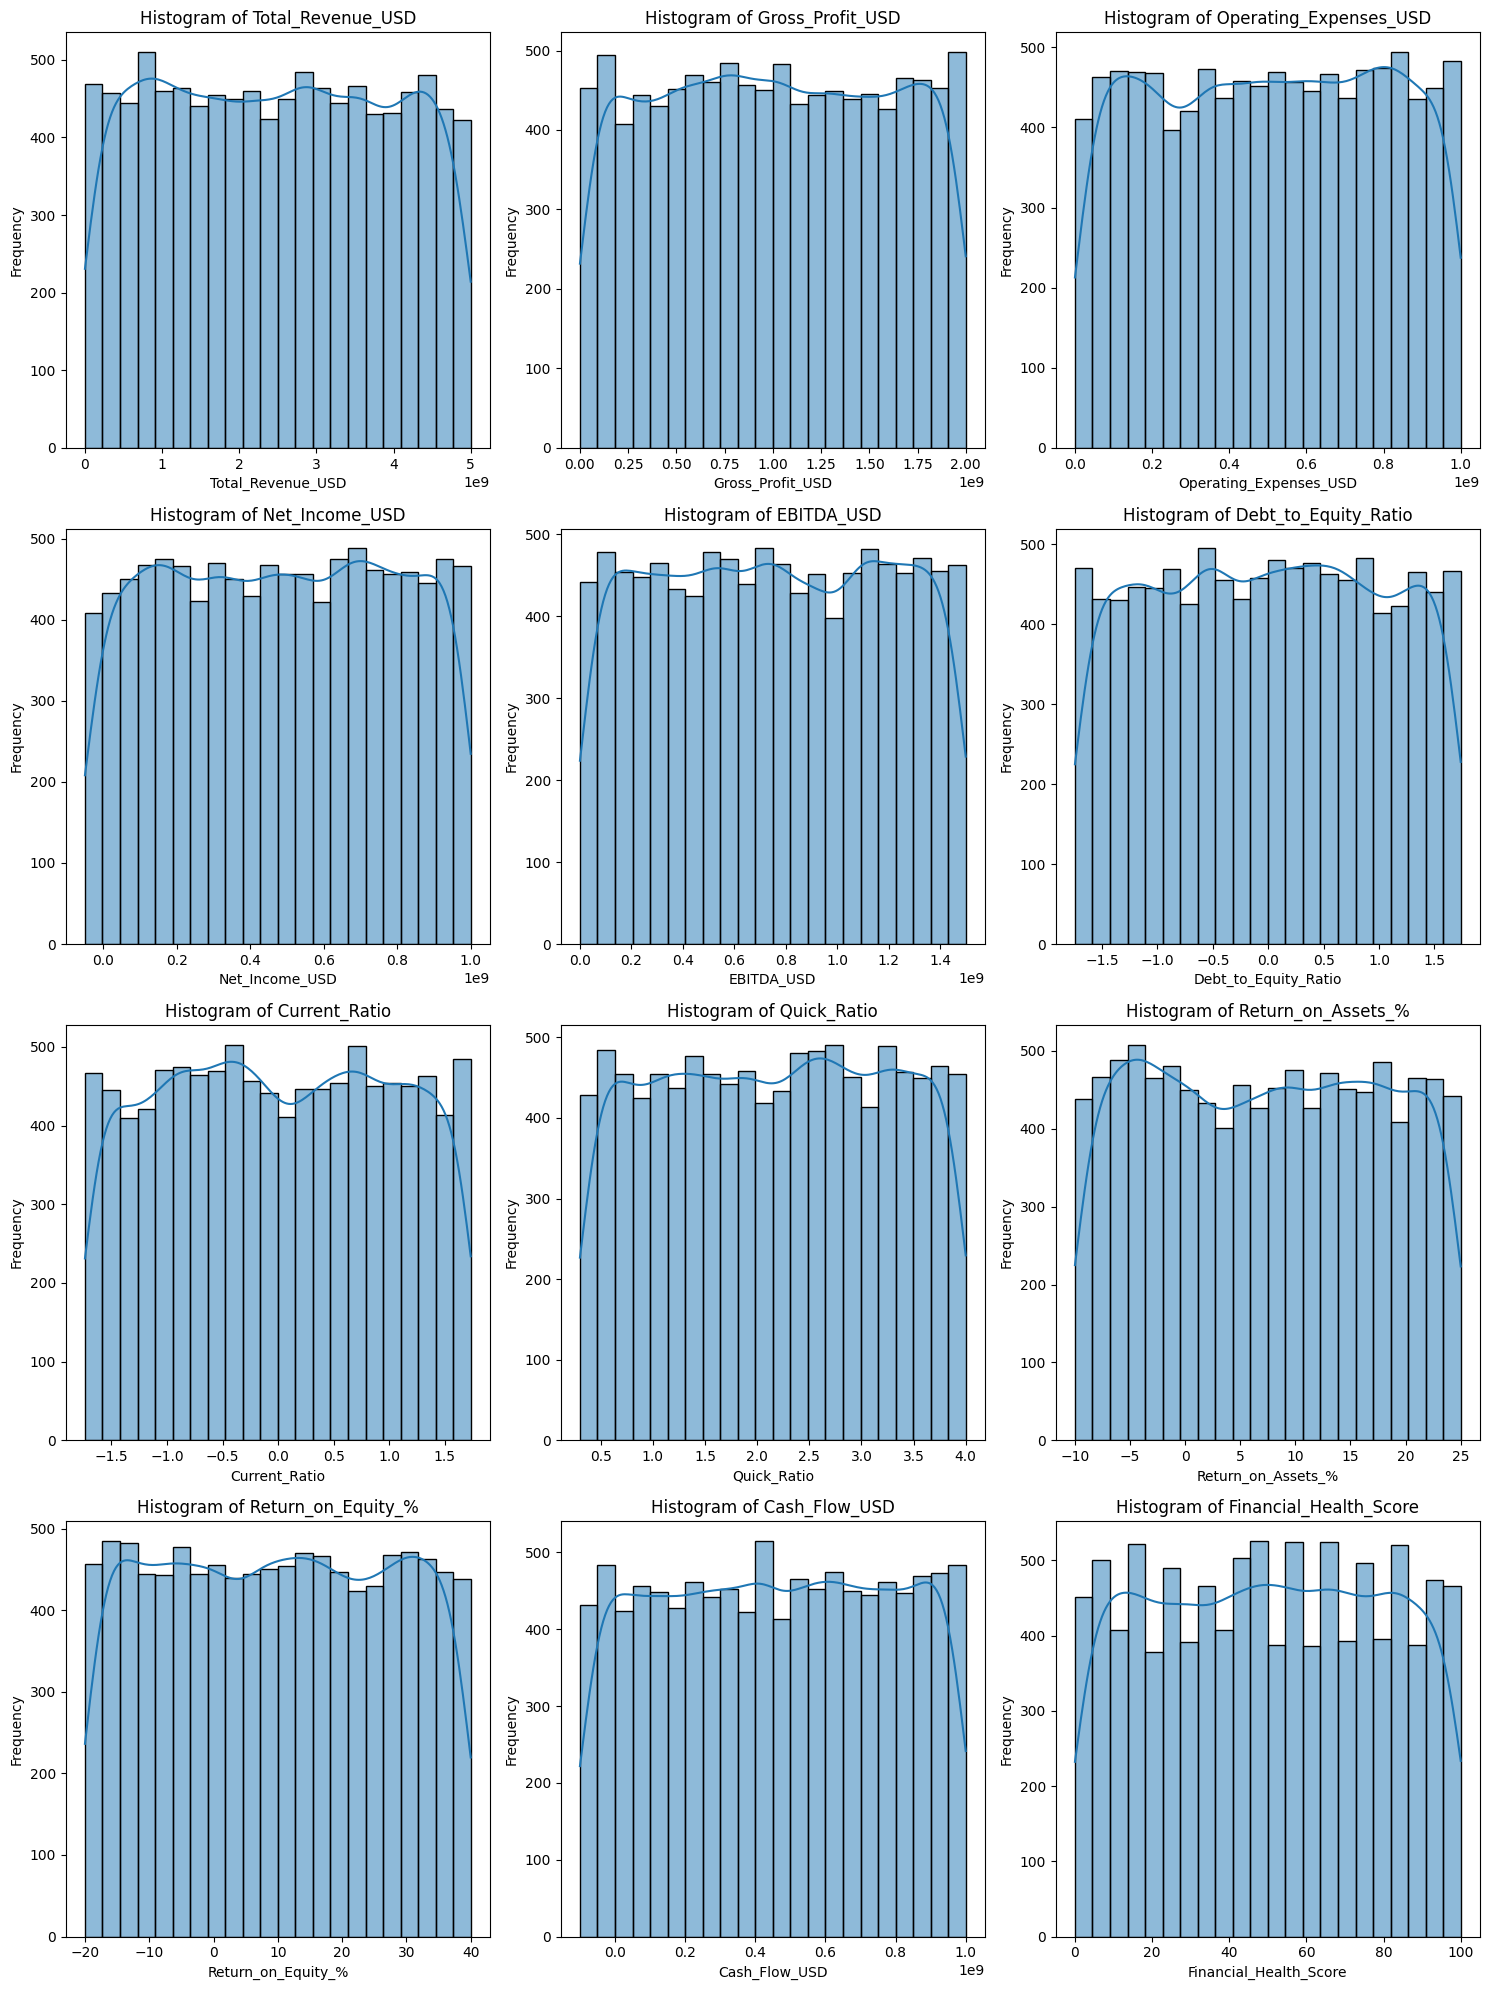

In [14]:
# prompt: Generate Histogram of all columns to verify if data is normally distributed

# Select numerical columns after all transformations (including one-hot encoding)
# This will include the original scaled numerical columns and the new dummy variables
numerical_cols_after_encoding = df.select_dtypes(include=np.number).columns

# Determine grid layout dynamically
n_cols_hist = len(numerical_cols_after_encoding)
if n_cols_hist > 0:
  n_rows_hist = (n_cols_hist + 2) // 3  # Aim for up to 3 columns per row

  plt.figure(figsize=(15, n_rows_hist * 5))

  for i, col in enumerate(numerical_cols_after_encoding):
      plt.subplot(n_rows_hist, 3, i + 1)
      sns.histplot(df[col], kde=True) # kde=True adds a kernel density estimate line
      plt.title(f'Histogram of {col}')
      plt.xlabel(col)
      plt.ylabel('Frequency')

  plt.tight_layout()
  plt.show()
else:
  print("No numerical columns found for plotting histograms.")

# Interpretation: Observe the shapes of the histograms.
# A bell-shaped curve suggests a normal distribution.
# Skewed distributions or multiple peaks indicate non-normality.
# Dummy variables will typically show two bars (0 and 1).
# This visualization helps assess the distribution of features and decide on further transformations if needed.

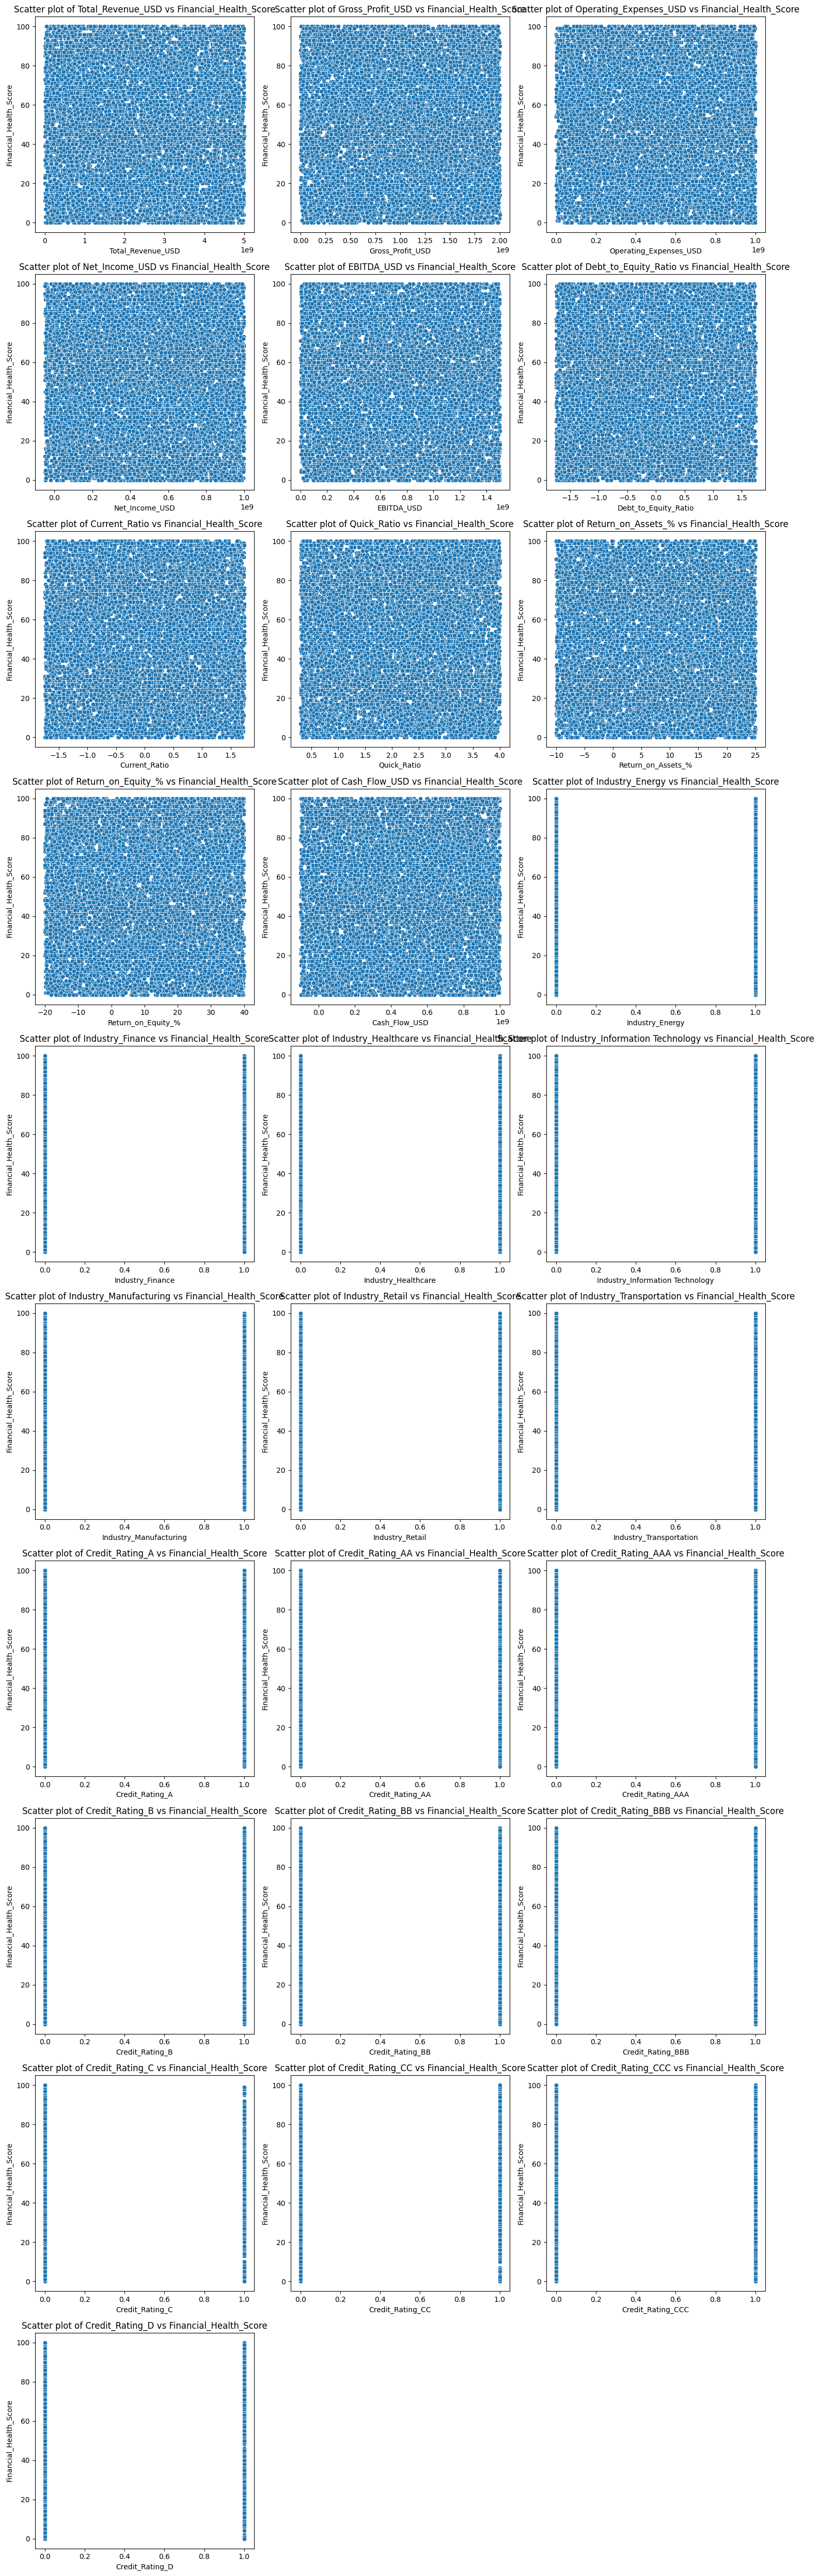

In [15]:
# prompt: Create scatter plots between each predictor and Financial_Health_Score to visually assess linearity

# Identify predictor variables and the target variable
predictors = df.columns.tolist()
# Remove the target variable from the predictors list
if 'Financial_Health_Score' in predictors:
    predictors.remove('Financial_Health_Score')
else:
    print("Warning: 'Financial_Health_Score' not found in DataFrame columns.")
    # If the target isn't named exactly 'Financial_Health_Score', you need to
    # identify the correct target column and remove it from the predictors.
    # For now, proceed with all columns except 'Financial_Health_Score' as predictors.

target = 'Financial_Health_Score'

# Check if the target variable exists
if target not in df.columns:
    print(f"Error: Target column '{target}' not found in the DataFrame.")
else:
    # Determine grid layout dynamically
    n_plots = len(predictors)
    if n_plots > 0:
        n_cols_scatter = 3  # Aim for up to 3 columns per row
        n_rows_scatter = (n_plots + n_cols_scatter - 1) // n_cols_scatter

        plt.figure(figsize=(15, n_rows_scatter * 5))

        for i, predictor in enumerate(predictors):
            plt.subplot(n_rows_scatter, n_cols_scatter, i + 1)
            sns.scatterplot(x=df[predictor], y=df[target])
            plt.title(f'Scatter plot of {predictor} vs {target}')
            plt.xlabel(predictor)
            plt.ylabel(target)

        plt.tight_layout()
        plt.show()
    else:
        print("No predictor columns found for plotting scatter plots.")

# Interpretation:
# - Look for a clear linear trend between the predictor and the target.
# - A roughly straight line indicates a linear relationship.
# - Curved patterns suggest a non-linear relationship.
# - Random scattering suggests little to no linear relationship.
# - Scatter plots are useful for visually assessing linearity and potential outliers.

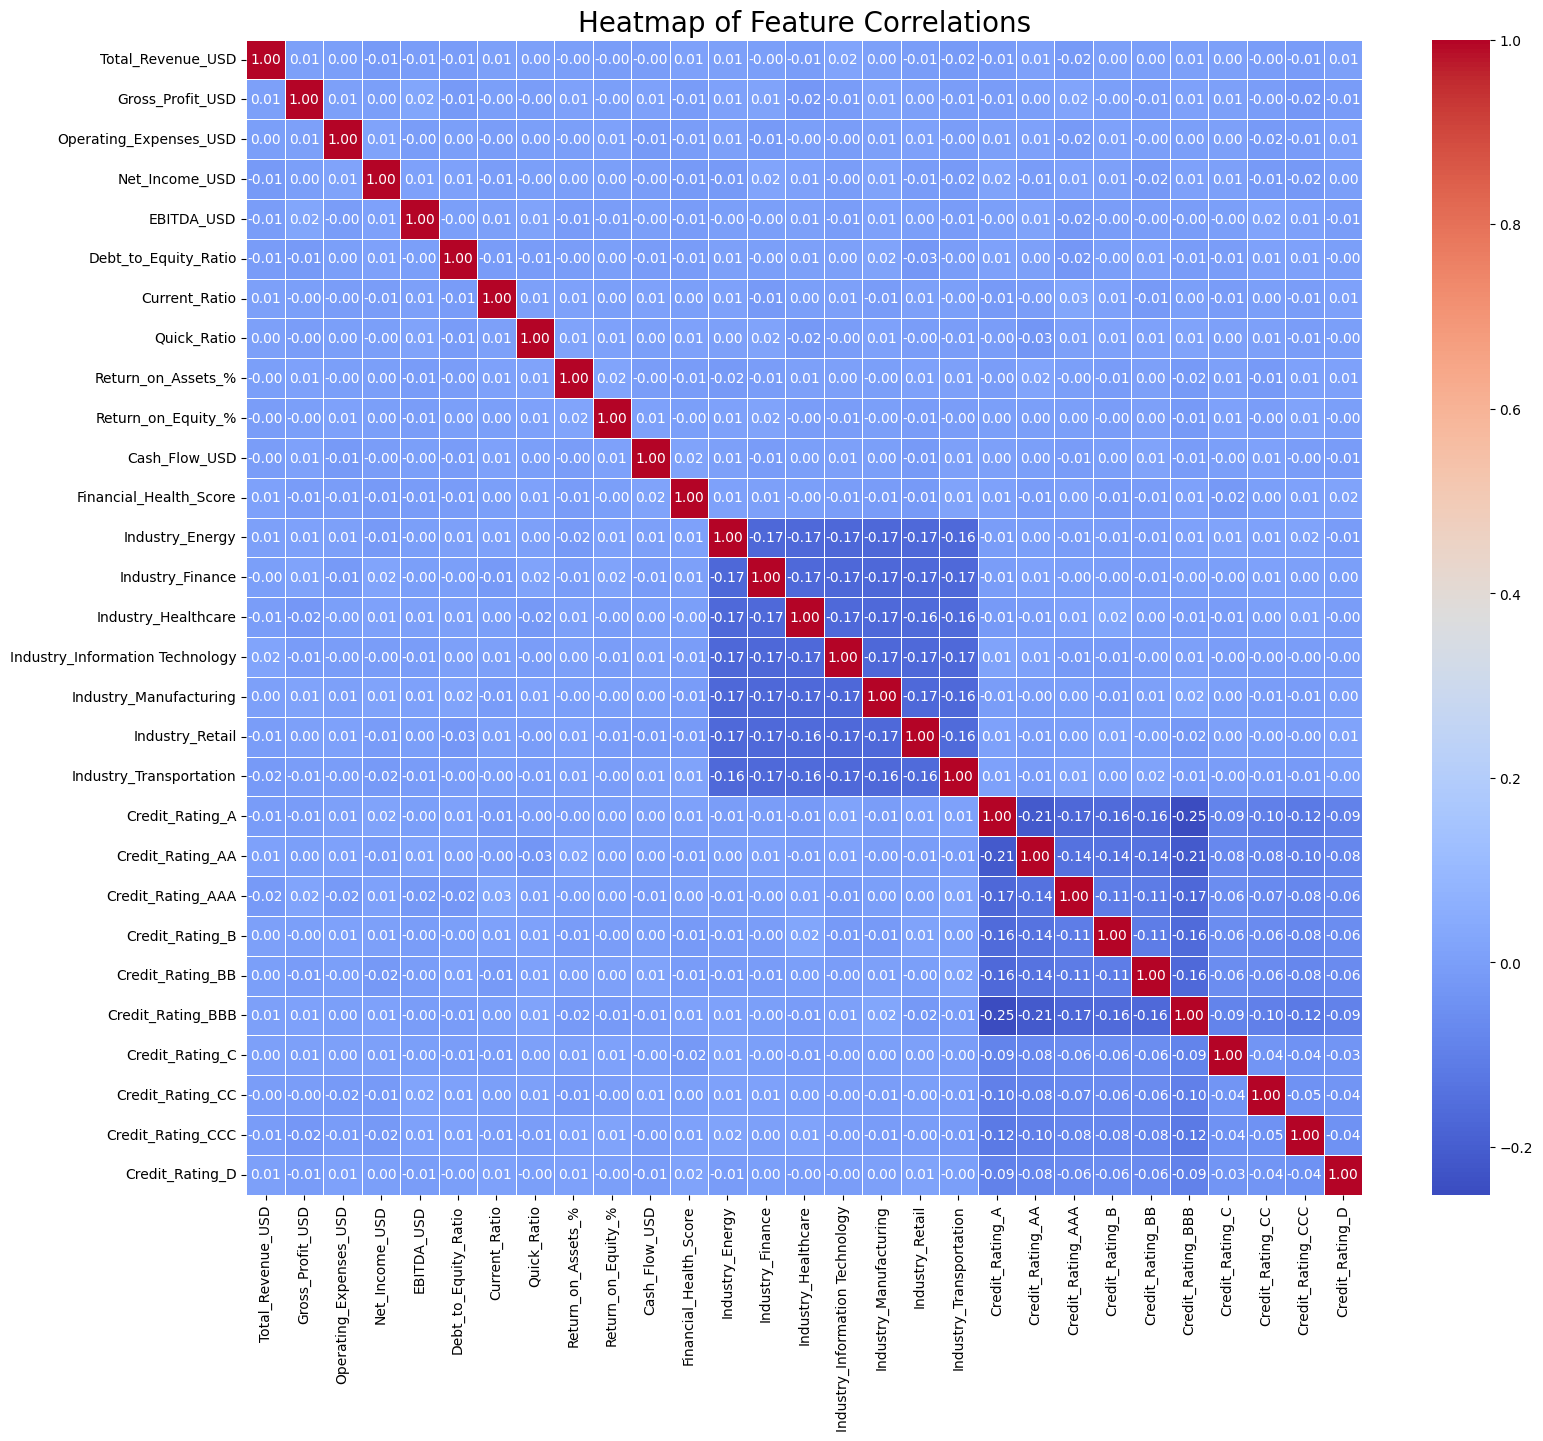

In [16]:
# prompt: Draw Heatmap to check multi-collinearity

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Feature Correlations', fontsize=20)
plt.show()

# Interpretation:
# - The heatmap visually represents the correlation coefficients between pairs of features.
# - Values close to +1 indicate a strong positive linear relationship.
# - Values close to -1 indicate a strong negative linear relationship.
# - Values close to 0 indicate a weak linear relationship.
# - Look for high correlation (e.g., > 0.7 or < -0.7) between independent predictor variables. This is indicative of multicollinearity.
# - Multicollinearity can cause problems in regression models (e.g., unstable coefficient estimates).
# - If high multicollinearity is detected, consider removing one of the highly correlated variables or using techniques like PCA.
# - Also, check the correlations between predictors and the target variable ('Financial_Health_Score'). High correlations here are desirable as they suggest the predictor is useful for predicting the target.

Interpretation:

Financial_Health_Score shows very weak correlations with all independent variables. The highest positive correlation is with Cash_Flow_USD and Credit_Rating_D (0.02).

There is no strong correlation (r > 0.8) between any pair of features, indicating no multicollinearity issues.

In [17]:
# prompt: Split “x” as independent variables and “y” as dependent variable

# Split data into features (X) and target (y)
X = df.drop('Financial_Health_Score', axis=1)
y = df['Financial_Health_Score']

print("Independent variables (X):")
print(X.head())

print("\nDependent variable (y):")
print(y.head())

Independent variables (X):
   Total_Revenue_USD  Gross_Profit_USD  Operating_Expenses_USD  \
0       1.027334e+09      1.179003e+09            3.049560e+08   
1       9.054109e+08      1.339129e+09            4.871704e+08   
2       4.702907e+09      9.444073e+08            1.190481e+08   
3       1.307339e+09      4.877999e+08            9.940402e+08   
4       1.874920e+09      1.798042e+09            3.430495e+08   

   Net_Income_USD    EBITDA_USD  Debt_to_Equity_Ratio  Current_Ratio  \
0    7.468690e+08  1.264810e+09              0.837392       1.516541   
1    8.189346e+08  1.178403e+09              0.225007       0.984258   
2    4.433828e+08  9.167690e+08              0.933453       0.181977   
3    3.346814e+08  7.426552e+08             -1.155861      -0.442877   
4    6.454143e+08  1.458184e+08             -1.660179      -0.543162   

   Quick_Ratio  Return_on_Assets_%  Return_on_Equity_%  ...  Credit_Rating_A  \
0         4.00               13.36               11.14  ...    

In [18]:
# prompt: convert true or false in independent variables in to binary

# Identify boolean columns
boolean_cols = X.select_dtypes(include='bool').columns

# Convert boolean columns to binary (True=1, False=0)
for col in boolean_cols:
  X[col] = X[col].astype(int)

print("\nIndependent variables (X) after converting boolean columns to binary:")
print(X.head())


Independent variables (X) after converting boolean columns to binary:
   Total_Revenue_USD  Gross_Profit_USD  Operating_Expenses_USD  \
0       1.027334e+09      1.179003e+09            3.049560e+08   
1       9.054109e+08      1.339129e+09            4.871704e+08   
2       4.702907e+09      9.444073e+08            1.190481e+08   
3       1.307339e+09      4.877999e+08            9.940402e+08   
4       1.874920e+09      1.798042e+09            3.430495e+08   

   Net_Income_USD    EBITDA_USD  Debt_to_Equity_Ratio  Current_Ratio  \
0    7.468690e+08  1.264810e+09              0.837392       1.516541   
1    8.189346e+08  1.178403e+09              0.225007       0.984258   
2    4.433828e+08  9.167690e+08              0.933453       0.181977   
3    3.346814e+08  7.426552e+08             -1.155861      -0.442877   
4    6.454143e+08  1.458184e+08             -1.660179      -0.543162   

   Quick_Ratio  Return_on_Assets_%  Return_on_Equity_%  ...  Credit_Rating_A  \
0         4.00     

In [19]:
# prompt: Divide the data in train and test in the ratio 80:20 respectively

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # random_state for reproducibility

print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)



Shape of X_train: (8000, 28)
Shape of X_test: (2000, 28)
Shape of y_train: (8000,)
Shape of y_test: (2000,)


In [20]:
# prompt: run multiple linear regression on x and y using statsmodel with constant

# Add a constant to the predictor variables
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the OLS model using the training data
model = sm.OLS(y_train, X_train).fit()

# Print the model summary
print(model.summary())

# You can now use the 'model' object to make predictions on the test set
# predictions = model.predict(X_test)

                              OLS Regression Results                              
Dep. Variable:     Financial_Health_Score   R-squared:                       0.002
Model:                                OLS   Adj. R-squared:                 -0.001
Method:                     Least Squares   F-statistic:                    0.7608
Date:                    Mon, 15 Sep 2025   Prob (F-statistic):              0.802
Time:                            15:15:28   Log-Likelihood:                -38264.
No. Observations:                    8000   AIC:                         7.658e+04
Df Residuals:                        7973   BIC:                         7.677e+04
Df Model:                              26                                         
Covariance Type:                nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

Interpretation:

First Iteration

From this first iteration, we can see that most financial ratios and metrics are not statistically significant (p-values > 0.05). However, several categorical variables representing industry and credit rating dummies are statistically significant with p-values < 0.05, suggesting they may influence the Financial_Health_Score.

Despite this, the overall model is not statistically significant as the Prob(F-statistic) is 0.802 > 0.05.

The model's R-squared is just 0.002, meaning only 0.2% of the variation in Financial_Health_Score is explained by the independent variables, while the remaining 99.8% remains unexplained.

In [21]:
# prompt: Extract VIF for all columns

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns

# Calculate VIF for each feature, excluding the constant term if added
# Start from index 1 to exclude the 'const' column added by sm.add_constant
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                  for i in range(X_train.shape[1])]

print("\nVariance Inflation Factor (VIF) for each feature:")
vif_data

# Interpretation:
# - VIF measures how much the variance of the estimated regression coefficient is increased due to multicollinearity.
# - A VIF of 1 means there is no correlation between this predictor and any other predictors.
# - A VIF between 1 and 5 indicates moderately correlated predictors.
# - A VIF greater than 5 or 10 suggests high multicollinearity, which might be problematic.
# - In this output, most VIF values are very close to 1, which confirms the earlier heatmap observation that there is no significant multicollinearity among the predictors.
# - The 'const' term's VIF is not relevant for interpreting multicollinearity among independent variables.

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



Variance Inflation Factor (VIF) for each feature:


feature       VIF
0                             const  0.000000
1                 Total_Revenue_USD  1.002713
2                  Gross_Profit_USD  1.004604
3            Operating_Expenses_USD  1.001956
4                    Net_Income_USD  1.003825
5                        EBITDA_USD  1.002779
6              Debt_to_Equity_Ratio  1.003531
7                     Current_Ratio  1.002576
8                       Quick_Ratio  1.003635
9                Return_on_Assets_%  1.002407
10               Return_on_Equity_%  1.002709
11                    Cash_Flow_USD  1.001547
12                  Industry_Energy       inf
13                 Industry_Finance       inf
14              Industry_Healthcare       inf
15  Industry_Information Technology       inf
16           Industry_Manufacturing       inf
17                  Industry_Retail       inf
18          Industry_Transportation       inf
19                  Credit_Rating_A       inf
20                 Credit_Rating_AA       inf
21                Credit_Rating_AAA       inf
22                  Credit_Rating_B       inf
23                 Credit_Rating_BB       inf
24                Credit_Rating_BBB       inf
25                  Credit_Rating_C       inf
26                 Credit_Rating_CC       inf
27                Credit_Rating_CCC       inf
28                  Credit_Rating_D       inf

Interpretation:

Testing whether Multicollinearity exists or not
From the output given beside, we can see that all continuous predictor variables have VIF values close to 1, indicating no signs of multicollinearity among them.

However, all industry and credit rating dummy variables show VIF as 'inf', suggesting perfect multicollinearity, likely due to dummy variable trap—i.e., including all categories without dropping a base category.

In [22]:
# prompt: eliminate the insignificant columns until only significant columns are left by backward elimination method

# Perform Backward Elimination to remove insignificant features
def backward_elimination(X_train, y_train, significance_level=0.05):
    """
    Performs backward elimination to select features based on p-values.

    Args:
        X_train (pd.DataFrame): Training data features (must include a constant).
        y_train (pd.Series): Training data target.
        significance_level (float): The threshold for p-value to consider a feature significant.

    Returns:
        pd.DataFrame: The training data features with insignificant columns removed.
    """
    X = X_train.copy()
    num_features = X.shape[1]
    selected_features = list(X.columns)

    while num_features > 0:
        # Fit the OLS model
        model = sm.OLS(y_train, X[selected_features]).fit()
        # Get the p-values
        p_values = model.pvalues

        # Find the feature with the highest p-value (excluding the constant)
        # If 'const' exists, ensure it's not considered for removal based on p-value here
        if 'const' in p_values.index:
            p_values_for_check = p_values.drop('const', errors='ignore')
        else:
            p_values_for_check = p_values

        if len(p_values_for_check) == 0:
            # No more features to check (only constant or empty)
            break

        max_p_value = p_values_for_check.max()
        # Get the name of the feature with the max p-value
        feature_to_remove = p_values_for_check.idxmax()

        # Check if the highest p-value is greater than the significance level
        if max_p_value > significance_level:
            print(f"Removing feature '{feature_to_remove}' with p-value {max_p_value:.4f}")
            # Remove the feature with the highest p-value
            selected_features.remove(feature_to_remove)
            num_features -= 1
        else:
            # All remaining features have p-values <= significance_level
            print("All remaining features are significant.")
            break

    # Return the DataFrame with only the selected features
    return X[selected_features]

# Apply Backward Elimination to the training data
X_train_significant = backward_elimination(X_train, y_train)

# Update the test set to include only the significant features found in the training set
# Ensure 'const' is present if it was in the final X_train_significant
final_features = X_train_significant.columns.tolist()
# If 'const' was added and is in the final list, ensure it's in X_test
if 'const' in final_features and 'const' not in X_test.columns:
     X_test = sm.add_constant(X_test, has_constant='add')

# Select only the significant features in the test set
X_test_significant = X_test[final_features]

print("\nTraining data with significant features after Backward Elimination:")
print(X_train_significant.head())
print("\nShape of X_train_significant:", X_train_significant.shape)

print("\nTest data with significant features after Backward Elimination:")
print(X_test_significant.head())
print("\nShape of X_test_significant:", X_test_significant.shape)

# Fit the OLS model again with the significant features
final_model = sm.OLS(y_train, X_train_significant).fit()

# Print the summary of the final model
print("\nSummary of the final model after Backward Elimination:")
print(final_model.summary())

Removing feature 'Total_Revenue_USD' with p-value 0.9867
Removing feature 'EBITDA_USD' with p-value 0.9476
Removing feature 'Credit_Rating_C' with p-value 0.9309
Removing feature 'Current_Ratio' with p-value 0.8343
Removing feature 'Operating_Expenses_USD' with p-value 0.7753
Removing feature 'Gross_Profit_USD' with p-value 0.7591
Removing feature 'Return_on_Equity_%' with p-value 0.7042
Removing feature 'Debt_to_Equity_Ratio' with p-value 0.6830
Removing feature 'Net_Income_USD' with p-value 0.3452
Removing feature 'Return_on_Assets_%' with p-value 0.2434
Removing feature 'Credit_Rating_B' with p-value 0.2379
Removing feature 'Credit_Rating_BB' with p-value 0.2378
Removing feature 'Credit_Rating_AA' with p-value 0.3141
Removing feature 'Credit_Rating_A' with p-value 0.3119
Removing feature 'Credit_Rating_CC' with p-value 0.3383
Removing feature 'Credit_Rating_D' with p-value 0.3385
Removing feature 'Credit_Rating_AAA' with p-value 0.3215
Removing feature 'Credit_Rating_BBB' with p-val

Interpretation:

After dropping all insignificant independent variables and retaining only statistically significant ones, the final model includes only industry category dummies, each having a p-value < 0.05.

The final model is:

Financial_Health_Score = 43.6481 + 7.41 × Industry_Energy + 6.18 × Industry_Finance + 6.19 × Industry_Healthcare + 5.52 × Industry_Information_Technology + 5.64 × Industry_Manufacturing + 6.01 × Industry_Retail + 6.70 × Industry_Transportation

Each coefficient represents the average increase in Financial Health Score compared to the base industry (not shown due to dummy variable drop).

Although all remaining features are statistically significant (p < 0.05), the R-squared is 0.000, meaning the model does not explain any meaningful variation in the dependent variable.
This implies that despite statistical significance, the practical predictive power of the model is negligible.

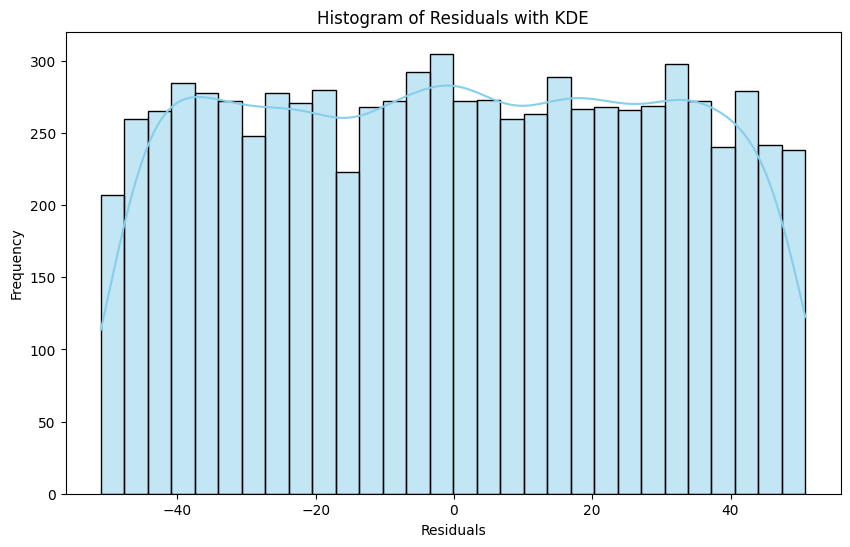

In [23]:
# prompt: check whether residuals are normally distributed with histogram and line

# Check for normality of residuals
residuals = final_model.resid

# Plot histogram with a line
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='skyblue', bins=30)
plt.title('Histogram of Residuals with KDE')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Interpretation:
# - A histogram of the residuals should ideally be bell-shaped and centered around zero if the residuals are normally distributed.
# - The Kernel Density Estimate (KDE) line overlaid on the histogram provides a smoothed representation of the distribution, making it easier to assess its shape compared to a normal distribution curve.
# - Deviations from a normal distribution might indicate issues with the model assumptions, such as non-linearity or heteroscedasticity.
# - If the histogram and KDE line look reasonably symmetric and unimodal, it suggests that the assumption of normally distributed residuals is met.

Interpretation:

Testing whether Errors are Normally distributed or not:

The histogram of residuals displays a nearly uniform distribution rather than a bell-shaped curve, with bars relatively flat across the range. The presence of a mostly flat KDE line reinforces the absence of normality.

This violation of the normality assumption suggests that the model’s error terms are not normally distributed, which can make statistical inference (like hypothesis testing and confidence intervals) unreliable, especially at the distribution’s extremes.

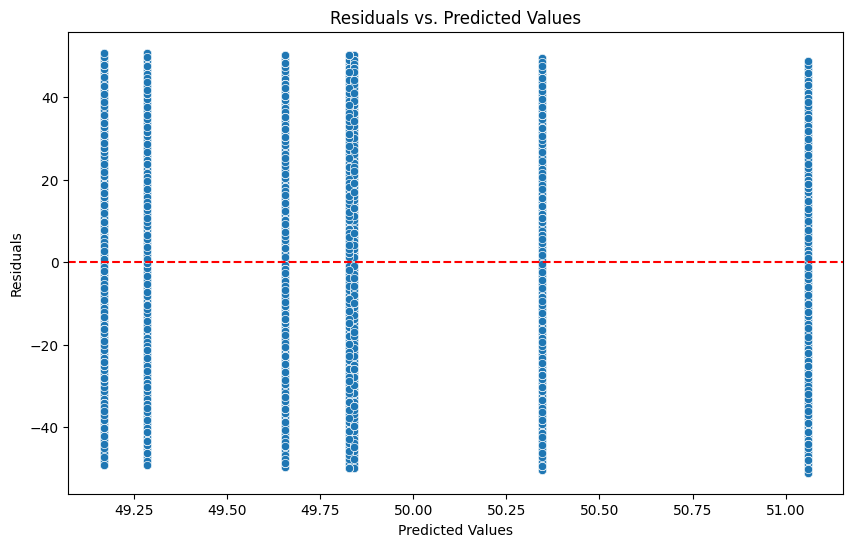

In [24]:
# prompt: Plot residuals vs predicted values

# Check for homoscedasticity (constant variance of residuals)
# Plotting residuals vs predicted values
plt.figure(figsize=(10, 6))
# Get predicted values from the final model (on the training data)
predicted_values = final_model.predict(X_train_significant)

sns.scatterplot(x=predicted_values, y=residuals)
plt.axhline(y=0, color='r', linestyle='--') # Add a horizontal line at y=0
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Interpretation:
# - A scatter plot of residuals versus predicted values is used to check for homoscedasticity (constant variance of residuals).
# - If the residuals are homoscedastic, the points should be randomly scattered around the horizontal line at zero, with no clear pattern (like a funnel shape or a curve).
# - A funnel shape (either widening or narrowing) indicates heteroscedasticity, meaning the variance of the residuals is not constant across the range of predicted values.
# - Patterns in the residuals plot can also suggest that the linear model is not appropriate or that important variables are missing.
# Interpretation:
#
# Testing for Homoscedasticity:
#
# The scatter plot of residuals versus predicted values shows a clear pattern, where the spread of the residuals increases as the predicted values increase. This funnel shape indicates heteroscedasticity, meaning the variance of the residuals is not constant across all levels of the predicted values.
#
# This violation of the homoscedasticity assumption suggests that the model's standard errors and confidence intervals may be unreliable. Further analysis or transformations might be needed to address this issue.

Interpretation:

Testing Homoscedasticity by plotting “Residuals vs Predicted Values”

The residuals appear to be evenly spread around the zero line and show no distinct pattern, curve, or funnel shape. Despite the predicted values being clustered at a few discrete levels, the vertical spread of residuals remains consistent across these clusters.

This indicates homoscedasticity, meaning that the variance of residuals is stable across predicted values. As a result, the assumption of constant error variance holds true, reinforcing the reliability of the model’s standard errors and confidence intervals.

In [25]:
# prompt: Test the homoscedasticity using white test

# Install the required library if not already installed
!pip install statsmodels

# Import the test function
from statsmodels.stats.diagnostic import het_white

# Perform the White test for heteroscedasticity
# model.resid gives the residuals of the OLS model
# model.model.exog gives the exogenous variables (predictors) used in the model
white_test = het_white(model.resid, model.model.exog)

# The output of the White test is a tuple containing:
# 1. Lagrange multiplier test statistic
# 2. P-value for the test statistic
# 3. F-statistic
# 4. P-value for the F-statistic

lm_statistic, lm_p_value, f_statistic, f_p_value = white_test

print("\nWhite's Test for Heteroscedasticity:")
print(f"  Lagrange multiplier statistic: {lm_statistic:.4f}")
print(f"  Lagrange multiplier p-value: {lm_p_value:.4f}")
print(f"  F-statistic: {f_statistic:.4f}")
print(f"  F-statistic p-value: {f_p_value:.4f}")

# Interpretation of the White test:
# The null hypothesis (H0) is that the residuals are homoscedastic (constant variance).
# The alternative hypothesis (H1) is that the residuals are heteroscedastic (non-constant variance).
# If the p-value (either from the LM statistic or the F-statistic) is less than the significance level (e.g., 0.05), we reject the null hypothesis and conclude that heteroscedasticity is present.
# If the p-value is greater than the significance level, we fail to reject the null hypothesis and conclude there is not enough evidence to suggest heteroscedasticity.

if lm_p_value < 0.05:
    print("\nInterpretation: The White test (Lagrange multiplier p-value < 0.05) suggests that heteroscedasticity is present.")
else:
    print("\nInterpretation: The White test (Lagrange multiplier p-value >= 0.05) suggests that there is no significant evidence of heteroscedasticity.")

# Note: You can also use the F-statistic p-value for the interpretation.
if f_p_value < 0.05:
     print("(Using F-statistic p-value < 0.05 also indicates heteroscedasticity is present.)")
else:
    print("(Using F-statistic p-value >= 0.05 also indicates no significant evidence of heteroscedasticity.)")

# Compare with the scatter plot interpretation:
# The White test provides a statistical method to formally test the assumption that you visually assessed with the scatter plot.
# If the scatter plot shows a clear pattern (like a funnel) and the White test p-value is low, they both indicate heteroscedasticity.
# If the scatter plot shows random scatter and the White test p-value is high, they both support homoscedasticity.
# If there is a conflict, it might warrant further investigation or using robust standard errors.



White's Test for Heteroscedasticity:
  Lagrange multiplier statistic: 121.0708
  Lagrange multiplier p-value: 0.9347
  F-statistic: 0.8265
  F-statistic p-value: 0.9365

Interpretation: The White test (Lagrange multiplier p-value >= 0.05) suggests that there is no significant evidence of heteroscedasticity.
(Using F-statistic p-value >= 0.05 also indicates no significant evidence of heteroscedasticity.)


Interpretation:

Testing Homoscedasticity using White Test
The White test shows no evidence of heteroscedasticity, as the p-value (0.9347) is greater than 0.05. This suggests that the model’s error variance is consistent across predictions. The assumption of homoscedasticity holds true, meaning the model’s errors are evenly and stably distributed throughout the prediction range.